# Treatment Effect

This notebook covers the following topics:

1. Correlation vs. Causality
2. Selection Bias
3. Randomized Controlled Experiment and the Difference Estimator
4. Star Experiment: Effect of Small Class Size
5. Natural Experiments and Difference-in-Difference Estimator

In [1]:
options(warn=-1)

In [2]:
library(Ecdat)
library(dplyr)

Loading required package: Ecfun

Attaching package: ‘Ecfun’

The following object is masked from ‘package:base’:

    sign


Attaching package: ‘Ecdat’

The following object is masked from ‘package:datasets’:

    Orange


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Correlation

Correlation is a measure of the linear relationship between two variables.

The (sample) correlation between two variables X and Y is:

$$
Corr \left(X,Y\right) = \frac{\sum_{i=1}^{n} \left(x_{i} - \bar{x}\right)\left(y_{i} - \bar{y}\right)}{\sqrt{\sum_{i=1}^{n} \left(x_{i} - \bar{x}\right)^2}\sqrt{\sum_{i=1}^{n}\left(y_{i} - \bar{y}\right)^{2}}}
$$

Measures of correlation $Corr(X,Y)$ always range between -1 and 1

$$
-1 \leq Corr(X,Y) \leq 1
$$

If $Y=X^{2}$ and $X\:\varepsilon\: \left[-10,10\right]$ then the correlation between X and Y is 0.
* They are uncorrelated even though they are perfectly related

### Strong correlation between A and B

If *A* and *B* are strongly correlated there could be several reasons why:
* *A* causes *B*
* *B* causes *A*
    * Be careful about declaring [reverse causality](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation#B_causes_A_(reverse_causation_or_reverse_causality)!
* *A* and *B* are caused by some other factor *C*
* A transitive relationship where *A* causes *C* which in turn causes *B*
* *A* and *B* are correlated by chance

### Post Hoc Ergo Propter Hoc

Latin: *"after this, therefore because of this"*
* Logical fallacy that if A happened and then B happened then A must have caused B to happen

Be careful drawing conclusions based solely on order of events.

### Causation

To establish causation:
1. In time, the hypothesized cause must precede its anticipated effect
2. The change in cause must lead to a change in effect
3. Must discount all other plausible explanations, other than the one proposed, that could explain the relationship

[reference](https://www.sciencedirect.com/science/article/pii/S0272775712000684)

### Why do we need to establish causality?

* Required in fields like medicine
* Causal models are used to build theories
* Need to determine causal impact of making changes to existing operations

## Selection bias

Selection bias occurs when individuals are selected for treatment without proper randomization.
* Self-selection:
    * Ex: a university offers a program to measure and improve teaching effectiveness that allows faculty to opt in - it could be the case that those faculty who did this program were already very effective teachers and wanted to become even more effective.
* Voluntary response bias
    * Ex: callers to a radio show are folks who are already interested in the topic. This sample over-represents people who are already in that topic. They may not be representative of the population.
* Nonresponse bias
    * If non-respondents differ from resspondents
    * Often a problem in surveys where response rate can be very low
    
### Assumptions in OLS estimation when estimating slope coefficient

* $Y=b_{0} + b_{1}X + \varepsilon$
* When we regress $Y$ on $X$, $Y=b_{0} + b_{1}X + \varepsilon$, we use the OLS estimator to estimate $b_{1}$

$$
b_{OLS} = \frac{Cov\left[X,Y\right]}{Cov\left[X,X\right]} = \frac{Cov\left(b_{0} + b_{1}X + e, X\right)}{Cov\left[X,X\right]}
$$

$$
=\frac{b_{1}Cov\left[X,X\right] + Cov\left[e,X\right]}{Cov\left[X,X\right]} = b_{1} + \frac{Cov\left[e,X\right]}{Cov\left[X,X\right]}
$$

* Orthogonality Assumption: $Cov\left(e,X\right)=0$
* When $X$ and $e$ are uncorrelated, $b_{OLS}$ is a good estimate of $b_{1}$
* When $X$ and $e$ are correlated, $b_{OLS}$ is not a good estimate of $b_{1}$

### Assumptions in linear regression model

* $Y=b_{0} + b_{1}X + e$
* When we regress $Y$ on $X$, $Y=b_{0}+b_{1}X+e$, we use the OLS estimator to estimate $b_{1}$:
* When X is a dummy variable,

$$
b_{OLS} = b_{1} + \frac{Cov\left[e,X\right]}{Cov\left[X,X\right]} = b_{1} + \left(\bar{e}_{1} - \bar{e}_{0}\right)
$$

* $b_{1}$ is called the ***treatment effect***
* $\left(\bar{e}_{1} - \bar{e}_{0}\right)$ is termed as the ***selection bias***
    * When $\left(\bar{e}_{1} - \bar{e}_{0}\right) = 0$, $b_{OLS}$ is a good estimate of $b_{1}$
    * When $\left(\bar{e}_{1} - \bar{e}_{0}\right) \neq 0$, $b_{OLS}$ is a bad estimate of $b_{1}$

### How can selection bias be controlled?

* ***Randomized controlled experiment:*** Random assignment of test subjects and control groups, we can prevent selection bias.
    * Used in agriculture and medicine
    * Increasingly being used in business settings

* ***Natural Experiment***
* Add ***control variables*** (weaker approach)

## Randomized controlled experiment

Designing a randomized controlled experiment follows this pattern:
1. A psuedorandom number *PRN* is sampled from a uniform distribution
2. If $PRN < 0.5$, the observation or subject is added to the control group $d=0$
3. If $PRN \geq 0.5$, the observation or subject is added to the test group $d=1$

### Regression model

* Define indicator variable $d$ as:

$$
d_{i} = \left\{
\begin{array}{ll}
  1 \: \: \text{individual i in treatment group}\\
  0 \: \: \text{individual i in treatment group}\\
\end{array}
\right.
$$

* Regression model is:

$$
y_{i} = b_{0} + b_{1}d_{i} + e_{i}
$$

where $i=1,\ldots,N$

*i* is one of the *N* individuals in the study

* Regression functions are:

$$
E\left(y_{i}\right) = \left\{
\begin{array}{ll}
  b_{0} + b_{1} \: \: \text{individual i in treatment group, i.e.,}\,d_{i}=1\\
  b_{0} \: \: \text{individual i in control group, i.e.,}\,d_{i}=0\\
\end{array}
\right.
$$

### Regression Model (Difference Estimator)

The OLS estimator for $b_{1}$, the treatment effect is:

$$
b_{OLS} = \frac{Cov\left[X,Y\right]}{Cov\left[X,X\right]} = \frac{\sum_{i=1}^{N}\left(d_{i} - \bar{d}\right) \left(y_{i} - \bar{y}\right)}{\sum_{i=1}^{N}\left(d_{i} - \bar{d}\right)^{2}} = \bar{y}_{1} - \bar{y}_{0}
$$

with:

$$
\bar{y}_{1} = \sum_{i=1}^{N_{1}} \frac{y_{i}}{N_{1}}
$$

and

$$
\bar{y}_{0} = \sum_{i=1}^{N_{0}} \frac{y_{i}}{N_{0}}
$$

where:
* $N_{1}=$ # of observations in the treatment group
* $N_{0}=$ # of observations in the control group

$b_{OLS}$ is called the ***difference estimator*** because it is the difference between the sample means of the treatment and control groups.

We can also rewrite $b_{OLS}$ as:

$$
b_{OLS} = \frac{\sum_{i=1}^{N}\left(d_{i} - \bar{d}\right) \left(e_{i} - \bar{e}\right)}{\sum_{i=1}^{N}\left(d_{i} - \bar{d}\right)^{2}} = b_{1} + \left(\bar{e}_{1} - \bar{e}_{0}\right)
$$

* If we allow individuals to self-select into treatment and control groups, then $E\left(\bar{e}_{1}\right) - E\left(\bar{e}_{0}\right)$ is the selection bias in the estimation of the treatment effect
* By using random assignment of individuals to treatment and control groups, we have no systematic differences between the two groups, except for the treatment itself
* By using random assignment, our goal is an ***unbiased OLS estimator***:

$$
E\left(\bar{e}_{1} - \bar{e}_{0}\right) = E\left(\bar{e}_{1}\right) - E\left(\bar{e}_{0}\right) = 0
$$

## STAR Experiment

The [STAR Experiment](http://piketty.pse.ens.fr/files/Krueger1999.pdf) is the only large-scale randomized controlled experiment applied to the education system in the United States. The researchers were testing a hypothesis that class size had an effect on educational outcome. Both students *and* teachers were randomly assigned to one of three groups:
1. Small classes (13-17 students)
2. Regular-sized classes (22-27 students)
3. Regular-sized classes with a TA

The data collected from the STAR experiment is present in the R package `Ecdat`.

In [3]:
df <- dplyr::filter(Ecdat::Star,
                    classk=="small.class"|classk=="regular")

In [4]:
head(df)

tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn
473,447,small.class,7,girl,no,white,63
536,450,small.class,21,girl,no,black,20
559,448,regular,16,boy,no,white,69
489,447,small.class,5,boy,yes,white,79
454,431,regular,8,boy,yes,white,5
500,451,regular,3,girl,no,white,56


Let's make a new variable called `totalscore` that is the sum of the `tmathssk` and `treadssk` variables.

Let's also create four dummy variables:

$$
small = \left\{
\begin{array}{ll}
  1 \: \: \text{if classk = small.class}\\
  0 \: \: \text{otherwise}\\
\end{array}
\right.
$$

$$
boy = \left\{
\begin{array}{ll}
  1 \: \: \text{if sex = boy}\\
  0 \: \: \text{otherwise}\\
\end{array}
\right.
$$

$$
whiteother = \left\{
\begin{array}{ll}
  1 \: \: \text{if race = white or race=other}\\
  0 \: \: \text{otherwise}\\
\end{array}
\right.
$$

$$
freelunch = \left\{
\begin{array}{ll}
  1 \: \: \text{if freelunk = yes}\\
  0 \: \: \text{otherwise}\\
\end{array}
\right.
$$

In [5]:
df$totalscore <- df$tmathssk + df$treadssk
df$small <- ifelse(df$classk=="small.class", 1, 0)
df$boy <- ifelse(df$sex=="boy", 1, 0)
df$whiteother <- ifelse(df$race=="white"|df$race=="other", 1, 0)
df$freelunch <- ifelse(df$freelunk=="yes", 1, 0)

In [6]:
head(df)

tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn,totalscore,small,boy,whiteother,freelunch
473,447,small.class,7,girl,no,white,63,920,1,0,1,0
536,450,small.class,21,girl,no,black,20,986,1,0,0,0
559,448,regular,16,boy,no,white,69,1007,0,1,1,0
489,447,small.class,5,boy,yes,white,79,936,1,1,1,1
454,431,regular,8,boy,yes,white,5,885,0,1,1,1
500,451,regular,3,girl,no,white,56,951,0,0,1,0


### Check for Random Assignment

* Apply logistic regression on `small` using the other factors and check if there are any significant coefficients
* We should not expect to see any significant coefficients

In [7]:
small_log_regression_a <- glm(small~boy+whiteother+totexpk+freelunch,
                              family=binomial(link='logit'),
                              data=df)

In [8]:
summary(small_log_regression_a)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.144373768,0.101497348,-1.42243882,0.1548989
boy,-0.001546021,0.065744501,-0.02351560,0.9812390
whiteother,0.037724954,0.079115207,0.47683569,0.6334791
totexpk,-0.003007123,0.005793192,-0.51907876,0.6037058
freelunch,0.006739089,0.073265741,0.09198145,0.9267128


None of the coefficients are significant so we can be confident that this randomized controlled experiment truly used random assignment.

### Summary stats

Now let's look at some aggregate measures across the two class sizes.

In [9]:
summary(df[which(df$small==0),c('totalscore','boy','whiteother','totexpk','freelunch')])

   totalscore          boy          whiteother       totexpk      
 Min.   : 635.0   Min.   :0.000   Min.   :0.000   Min.   : 0.000  
 1st Qu.: 866.0   1st Qu.:0.000   1st Qu.:0.000   1st Qu.: 4.000  
 Median : 912.0   Median :1.000   Median :1.000   Median : 9.000  
 Mean   : 917.9   Mean   :0.514   Mean   :0.682   Mean   : 9.078  
 3rd Qu.: 961.0   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:13.000  
 Max.   :1229.0   Max.   :1.000   Max.   :1.000   Max.   :24.000  
   freelunch     
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.4745  
 3rd Qu.:1.0000  
 Max.   :1.0000  

In [10]:
summary(df[which(df$small==1),c('totalscore','boy','whiteother','totexpk','freelunch')])

   totalscore          boy           whiteother        totexpk      
 Min.   : 747.0   Min.   :0.0000   Min.   :0.0000   Min.   : 0.000  
 1st Qu.: 878.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 4.000  
 Median : 924.0   Median :1.0000   Median :1.0000   Median : 8.000  
 Mean   : 932.1   Mean   :0.5141   Mean   :0.6884   Mean   : 8.991  
 3rd Qu.: 981.0   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:13.000  
 Max.   :1253.0   Max.   :1.0000   Max.   :1.0000   Max.   :27.000  
   freelunch     
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.4732  
 3rd Qu.:1.0000  
 Max.   :1.0000  

We can see that the composition of each class with respect to gender, race, teacher experience, and student income (measured using `freelunch`) is more or less equal across small classes and regular sized classes. Let's boxplot the `totalscore` vs. `small` to visualize the difference in outcome.

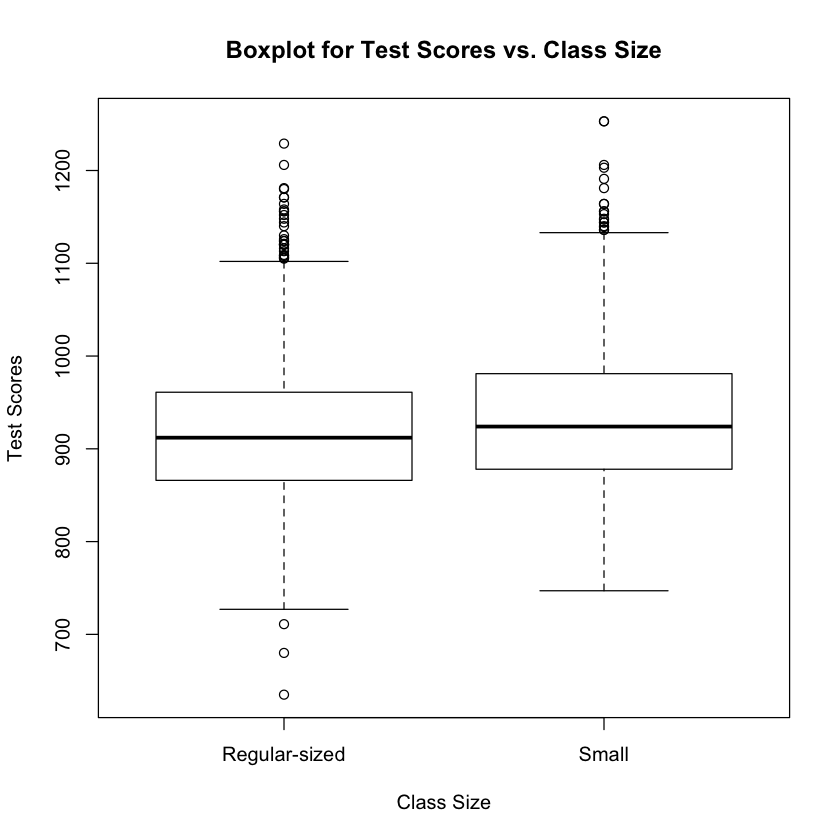

In [11]:
boxplot(totalscore~small,df, names = c('Regular-sized', 'Small'), main='Boxplot for Test Scores vs. Class Size', ylab='Test Scores', xlab='Class Size')

We can see visually that there appears to be a discernible bump in total test score performance for students in small classes vs. those in regular-sized classes. Let's see if the difference is statistically significant by building a linear regression model:

$$
totalscore = b_{0} + b_{1}small + e
$$

In [12]:
score_linear_regression_a <- lm(totalscore~small,df)
summary(score_linear_regression_a)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),917.94200,1.670154,549.615229,0.000000e+00
small,14.10878,2.451242,5.755767,9.319685e-09


The regression above simply tells us what we already know from looking at the aggregate statistics:
* Students in regular-sized classes have expected test scores of $917.94$
* Students in small classes have expected test scores of $917.94 + 14.11 = 932.05$

The coefficient value $b_{1}$ is referred to as the ***difference estimator*** and is equal to $14.11$. We can interpret this value as the difference in test score outcome if a student were moved from a regular-sized class to a small class, holding all other factors constant.

Let's add teacher experience `totexpk` to the regression model:

$$
totalscore = b_{0} + b_{1}small + b_{2}totexpk + e
$$

In [13]:
score_linear_regression_b <- lm(totalscore~small+totexpk,df)
summary(score_linear_regression_b)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),907.429284,2.5487122,356.034425,0.000000e+00
small,14.209798,2.4419559,5.819023,6.417707e-09
totexpk,1.158043,0.2126839,5.444903,5.517691e-08


Each additional year of teacher experience adds $1.16$ points to the `totalscore`. Notice we are getting a slight bump in our difference estimator from $14.11$ to $14.21$ holding all other variables constant.

The effect of having a small class size is equivalent to having a teacher with $\frac{14.21}{1.16} \approx $ 12 additional years of teaching experience! Oh the irony of learning this in a MOOC!

## Natural experiments

A natural experiment is based on observational study data from real world conditions. We approximate what would have happened in a randomized controlled experiment.
* In a natural experiment, the subjects who might be undergoing treatment are ***not able to choose if they are in a treatment or control group***
* The choice is made by an external agent or factor
    * Some subjects must be in the treatment group while others are in the control group for a natural experiment to work
    * Ex: weather event, policy change, etc.

Researchers compare the average change over time of the Y variable for the treatment group to the average change over time of the Y variable for the control group. This comparison is called ***difference-in-difference***.
* Panel data is used to measure these differences

### Examples of natural experiments

A treatment (manipulation/event) that just happened; not intenionally designed as an experiment:
* A law that changed the tax rate for some subjects, but not others
* A hurricane that hits a few stores among a large sample of stores
* A mobile carrier implements an unlimited data plan in some cities but not others
* Minimum wage is changed in one state but not another

### Counterfactual

When we are interested in estimating the causal impact of a treatment, we need to compare the outcome with the intervention to *what would have happened without the intervention*, i.e., a ***counterfactual***.
* The "control group" needs to be such that it is more or less similar to the "treatment group".
* If we can't establish counterfactuals, it is impossible to estimate treatment effects properly.

### An example of a natural experiment

[reference](https://www.sciencedirect.com/science/article/pii/S0167718713001252)

* Sales tax is lowered in NYC
* Neighboring states do not change sales tax for local stores
* We want to estimate the difference in purchase behavior between NYC and nearby states
* We measure sales in stores in NYC and nearby stores
* Lower local sales tax could result in:
    * Stronger tendency to buy locally
    * Lower internet sales
    
### Difference-in-Difference (D-in-D)

Consider time $t_{1}$ and time $t_{2}$, where $t_{!}$ occurs before the "treatment" and $t_{2}$ occurs after the "treatment". Let's call $t_{1}$ "Before" and $t_{2}$ "After" - we are measuring the average value of the dependent variable (Y).
* $A=$ average value of the dependent variable for the control group measured at time $t_{1}$
* $B=$ average value of the dependent variable for the treatment group measured at time $t_{1}$
* $C=$ average value of the dependent variable for the control group measured at time $t_{2}$
* $D=$ average value of the dependent variable for the treatment group measured at time $t_{2}$

|   | Before | After | Difference |
| --- | --- | --- | --- |
| Control | A | C | C-A |
| Treated | B | D | D-B |

* For the ***control group***, the difference of the average Y values at time $t_{2}$ (After) and time $t_{1}$, (Before) = $C-A$
* For the ***treatment group***, the difference of the average Y values at time $t_{2}$ (After) and time $t_{1}$, (Before) = $D-B$

The difference between these values is called ***difference-in-difference***.

$$
\text{Diff-in-Diff} = \left(D-B\right) - \left(C-A\right)
$$

#### Graphically

<img src="diff-in-diff.png">

### How do we estimate the diff-in-diff using regression?

For the NYC example above, we first create two dummy variables:

$$
NYC = \left\{
\begin{array}{ll}
  1 \: \: \text{if observation is from store in NYC}\\
  0 \: \: \text{otherwise}\\
\end{array}
\right.
$$

$$
After = \left\{
\begin{array}{ll}
  1 \: \: \text{if observation is in the After time period}\\
  0 \: \: \text{otherwise}\\
\end{array}
\right.
$$

Define $NYCAfter = NYC*After$, which is an interaction variable.
* We observe sales at stores in NYC (treatment) and sales at stores in surrounding areas (control) before and after NYC lowered its sales tax
* Regression model:
$$
\text{sales = }b_{0} + b_{!}NYC + b_{2}After + b_{3}NYCAfter
$$

#### Graphically
<img src="diff-in-diff2.png">

|   | Before | After | Difference (After - Before) |
| --- | --- | --- | --- |
| Control | $b_{0}$ | $b_{0} + b_{2}$ | $b_{2}$ |
| Treated | $b_{0} + b_{1}$ | $b_{0} + b_{1} + b_{2} + b_{3}$ | $b_{2}+ b_{3}$ |

$$
\text{Diff-in-Diff} = \left(b_{2} + b_{3}\right) - \left(b_{2}\right) = b_{3}
$$

$b_{3}$ is the coefficient of the interaction term `NYCAfter`

### Steps in Natural Experiment

1. Understand the treatmen (manipulation/event) that just happened
2. Check if we can theoretically argue that the treatment appears as if it were randomly assigned
    * assignment orthogonal to unobservable factors, $X$ orthogonal to $\varepsilon$
3. Check to see if there is a control/treatment group
4. Check empirical evidence to see the two groups are roughly the same before the experiment
5. Analyze the treatment effect using the difference-in-difference estimator